# WeatherPy

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #random.uniform 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) # while random.randint generate number/s have equal probability
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [42]:
# For reference
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
query_url = f"{url}appid={api_key}&q={city}&units={units}"
city_weather = requests.get(query_url).json()
city_weather

{'coord': {'lon': -50.22, 'lat': -30.17},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 72.9,
  'pressure': 1011.46,
  'humidity': 93,
  'temp_min': 72.9,
  'temp_max': 72.9,
  'sea_level': 1011.46,
  'grnd_level': 1001.56},
 'wind': {'speed': 4.5, 'deg': 29.0018},
 'clouds': {'all': 12},
 'dt': 1552013291,
 'sys': {'message': 0.0037,
  'country': 'BR',
  'sunrise': 1552036585,
  'sunset': 1552081582},
 'id': 3466165,
 'name': 'Cidreira',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Make a request for each of the indices
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

count = 1
set = 1
for city in cities:
    try:
        query_url = (f"{url}appid={api_key}&q={city}&units={units}")
        city_weather = requests.get(query_url).json()
        print(f"Processing Record {count} of Set {set}| {city_weather['name']}")
        
        city_name.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])     # Need to convert
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
              
        count+=1
        
        if count > 50:
              count = 1
              set += 1

    except:
        print('City not found. Skipping...')
                 
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| Say
Processing Record 2 of Set 1| Rikitea
Processing Record 3 of Set 1| Taungdwingyi
Processing Record 4 of Set 1| Bluff
Processing Record 5 of Set 1| Yelnya
Processing Record 6 of Set 1| Kodinsk
Processing Record 7 of Set 1| Mataura
City not found. Skipping...
Processing Record 8 of Set 1| Punta Arenas
Processing Record 9 of Set 1| Cape Town
Processing Record 10 of Set 1| Kapaa
Processing Record 11 of Set 1| Barrow
Processing Record 12 of Set 1| Cidreira
City not found. Skipping...
Processing Record 13 of Set 1| Ushuaia
Processing Record 14 of Set 1| Esperance
Processing Record 15 of Set 1| Oktyabrskoye
Processing Record 16 of Set 1| Carnarvon
Processing Record 17 of Set 1| Arraial do Cabo
Processing Record 18 of Set 1| Albany
Processing Record 19 of Set 1| Atuona
Processing Record 20 of Set 1| Itarema
Processing Record 21 of Set 1| Kungurtug
Processing Record 22 of Set 1| Dikson
Processing Record 23 

Processing Record 33 of Set 4| Eskisehir
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 4| Namatanai
Processing Record 35 of Set 4| Faya
City not found. Skipping...
Processing Record 36 of Set 4| Half Moon Bay
Processing Record 37 of Set 4| Airai
Processing Record 38 of Set 4| Alekseyevskoye
Processing Record 39 of Set 4| Faanui
Processing Record 40 of Set 4| Puerto Santander
Processing Record 41 of Set 4| Santa Cruz
Processing Record 42 of Set 4| San Carlos
Processing Record 43 of Set 4| Rome
City not found. Skipping...
Processing Record 44 of Set 4| Ballina
Processing Record 45 of Set 4| Victoria
Processing Record 46 of Set 4| Macas
Processing Record 47 of Set 4| Severo-Kurilsk
Processing Record 48 of Set 4| Nelson Bay
Processing Record 49 of Set 4| Namibe
City not found. Skipping...
Processing Record 50 of Set 4| Boshnyakovo
Processing Record 1 of Set 5| Mazagao
Processing Record 2 of Set 5| Komsomolskiy
Processing Record 3 of Set 5| Benalla
Proc

City not found. Skipping...
Processing Record 26 of Set 8| Do Gonbadan
Processing Record 27 of Set 8| Manaus
City not found. Skipping...
Processing Record 28 of Set 8| Chapais
Processing Record 29 of Set 8| Sompeta
Processing Record 30 of Set 8| Adelaide
Processing Record 31 of Set 8| Puerto Escondido
Processing Record 32 of Set 8| Vao
Processing Record 33 of Set 8| Igrim
Processing Record 34 of Set 8| Salalah
Processing Record 35 of Set 8| Russkaya Polyana
Processing Record 36 of Set 8| Fairbanks
Processing Record 37 of Set 8| Isangel
Processing Record 38 of Set 8| Dauriya
Processing Record 39 of Set 8| Shibetsu
Processing Record 40 of Set 8| Suifenhe
Processing Record 41 of Set 8| Srednekolymsk
Processing Record 42 of Set 8| Vardo
Processing Record 43 of Set 8| Muroto
Processing Record 44 of Set 8| Novaya Ladoga
City not found. Skipping...
Processing Record 45 of Set 8| Guerrero Negro
Processing Record 46 of Set 8| Tondano
Processing Record 47 of Set 8| Sur
Processing Record 48 of Se

City not found. Skipping...
Processing Record 14 of Set 12| Munxar
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_dict = {"City": city_name,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Latitude": lat,
               "Longitude": lng,
               "Max Temp": max_temp,
               "Wind Speed": wind_speed}

In [49]:
df = pd.DataFrame(weather_dict)
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Say,0,NE,1552014021,54,13.10,2.36,67.90,4.16
1,Rikitea,80,PF,1552013937,96,-23.12,-134.97,81.45,16.58
2,Taungdwingyi,88,MM,1552014022,97,20.00,95.55,71.95,2.48
3,Bluff,44,AU,1552013975,46,-23.58,149.07,89.86,16.02
4,Yelnya,88,RU,1552014022,88,54.58,33.19,41.44,19.60


In [50]:
df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Latitude      564
Longitude     564
Max Temp      564
Wind Speed    564
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

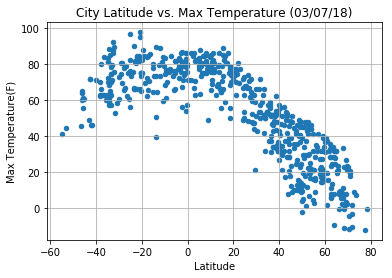

In [85]:
df.plot(kind='scatter',x='Latitude', y='Max Temp', marker='o')

#settings
plt.grid()

#detail
plt.title('City Latitude vs. Max Temperature (03/07/18)')
plt.ylabel('Max Temperature(F)')

plt.savefig('../Images/lat_vs_maxTemp')

#### Latitude vs. Humidity Plot
lat = 緯度
lon = 経度

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


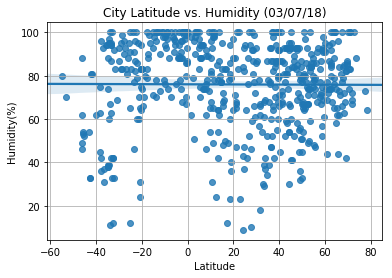

In [86]:
import seaborn as sns
sns.regplot(data=df, x='Latitude', y='Humidity')
#settings
plt.grid()

#detail
plt.title('City Latitude vs. Humidity (03/07/18)')
plt.ylabel('Humidity(%)')

plt.savefig('../Images/lat_vs_humidity')

#### Latitude vs. Cloudiness Plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


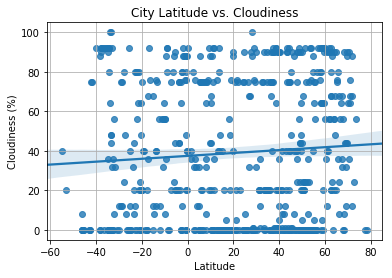

In [70]:
sns.regplot(data=df, x='Latitude', y='Cloudiness')

#settings
plt.grid()

#details
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")

plt.savefig('../Images/lat_vs_cloud')

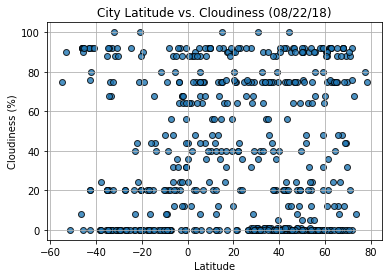

#### Latitude vs. Wind Speed Plot

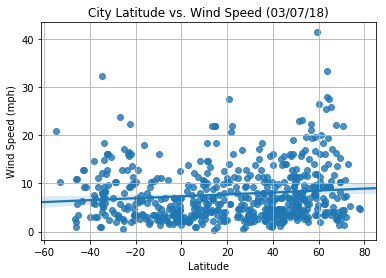

In [87]:
sns.regplot(x='Latitude', y='Wind Speed', data=df)

#settings
plt.grid()

#details
plt.title("City Latitude vs. Wind Speed (03/07/18)")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../Images/lat_vs_windSpeed')